Decision Tree Regressor
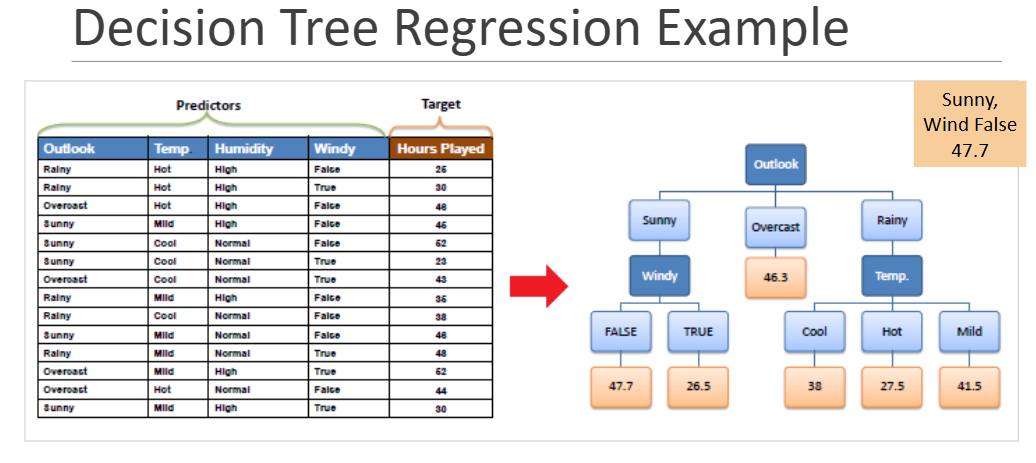

In [3]:
from warnings import filterwarnings
filterwarnings('ignore')

## Data Ingestion
### Independent features/Predcitors
    Power plant dataset
    AT : Atmospheric Temperature Celsius
    V : Vaccum Pressure in Pa
    AP : Atmospheric Pressure in Pa
    RH: Relative Humidity in %

    PE: Power plant energy output in MW

In [10]:
path = r"C:\Users\DELL\Downloads\PowerPlant.csv"
import pandas as pd
df = pd.read_csv(path)
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


## Perform basic data quality checks

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [15]:
df.shape

(9568, 5)

In [17]:
df.columns

Index(['AT', 'V', 'AP', 'RH', 'PE'], dtype='object')

In [19]:
# Missing values
df.isna().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

### There are no missing values

In [22]:
# Duplicated data
df.duplicated().sum()

41

### There are 41 duplicated rows in this data, lets drop them

In [25]:
df.drop_duplicates(keep='first',inplace=True)

In [27]:
df.duplicated().sum()

0

In [29]:
df.shape

(9527, 5)

## Separate X and Y features
Y => PE column : Energy output

In [32]:
df.columns

Index(['AT', 'V', 'AP', 'RH', 'PE'], dtype='object')

In [34]:
X = df.drop(columns='PE')
Y = df[["PE"]]

In [36]:
X.head()

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [38]:
Y.head()

,PE
0,480.48
1,445.75
2,438.76
3,453.09
4,464.43


## Data Preprocessing and Data Cleaning

In [45]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [49]:
con_pipe = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
).set_output(transform="pandas")

In [51]:
con_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [53]:
X_pre = con_pipe.fit_transform(X)
X_pre.head()

,AT,V,AP,RH
0,-1.520448,-1.066041,-0.403535,1.141599
1,0.534897,0.330813,-0.309262,0.059223
2,1.354348,0.205475,-1.024725,-2.151400
3,-0.079020,-0.362884,-1.012941,0.236538
4,-1.055645,-1.074713,0.655349,1.633837


## Split the data into training data and testing data using traintestsplit
    splitting: 
    Training Testing
        60%     40%
        70%     30%
        75%     25%
        80%     20%

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X_pre,Y,train_size=0.75,test_size=0.25,random_state=42)

In [58]:
xtrain.head()

,AT,V,AP,RH
1845,-0.886381,-0.795657,0.961736,0.845161
8505,0.939249,0.960659,-1.268824,-0.564462
8152,-0.957579,-0.966717,0.729421,0.563784
5023,0.143978,0.439598,0.983620,0.489161
1744,-1.214161,-0.967505,-2.257003,1.596868


In [60]:
xtest.head()

,AT,V,AP,RH
1087,1.827212,1.120683,-0.125767,-1.414069
6319,-1.501641,-1.244984,0.044260,-0.467246
8052,-1.465370,-1.418408,0.399466,-1.082031
9524,0.150695,0.648495,0.731104,-0.002393
4463,-0.036032,1.128565,-0.361449,1.586599


In [62]:
ytrain.head()

,PE
1845,469.02
8505,436.65
8152,469.18
5023,445.18
1744,472.41


In [64]:
ytest.head()

,PE
1087,429.38
6319,485.29
8052,480.40
9524,452.30
4463,446.47


## Build the model- Decision Tree Regressor

In [70]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(
    max_depth=3,
    min_samples_leaf=5,
    min_samples_split=3,
    criterion="squared_error"
)
model.fit(xtrain,ytrain)

DecisionTreeRegressor(max_depth=3, min_samples_leaf=5, min_samples_split=3)

In [72]:
model.score(xtrain,ytrain)

0.9083923132925783

In [74]:
model.score(xtest,ytest)

0.9097863922078586

## To overcome overfitting scenario, lets perform Hyperparameter tuning

In [77]:
params = {
    "max_depth" : [2,3,4,5,7,8],
    "min_samples_leaf" : [2,3,5,7,8,10],
    "min_samples_split":[2,3,5,7,8,9],
    "criterion":["squared_error","absolute_error"]
}

## Hyperparameter tuning model:
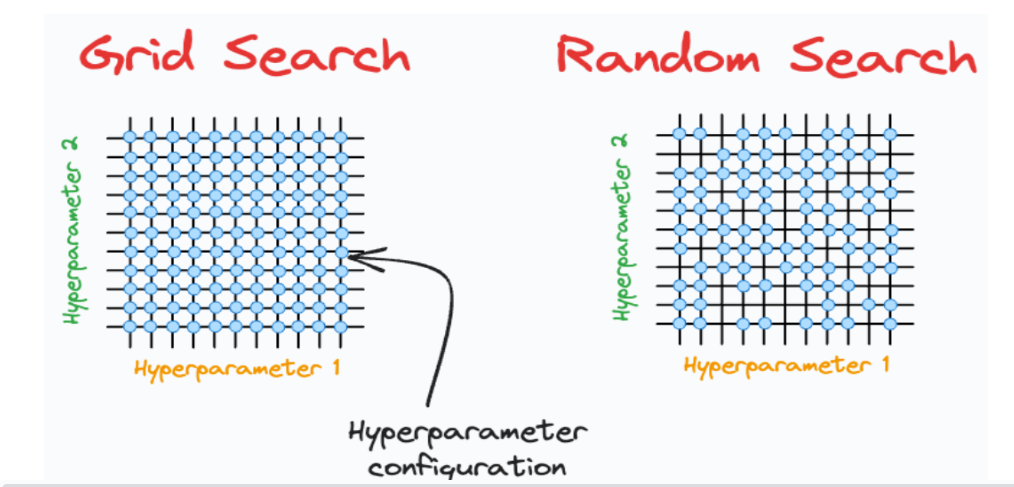

In [81]:
from sklearn.model_selection import RandomizedSearchCV
base_model = DecisionTreeRegressor()
rscv = RandomizedSearchCV(base_model,param_distributions=params,scoring="r2",cv=5)
rscv.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(),
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error'],
                                        'max_depth': [2, 3, 4, 5, 7, 8],
                                        'min_samples_leaf': [2, 3, 5, 7, 8, 10],
                                        'min_samples_split': [2, 3, 5, 7, 8,
                                                              9]},
                   scoring='r2')

In [83]:
rscv.best_params_

{'min_samples_split': 7,
 'min_samples_leaf': 8,
 'max_depth': 8,
 'criterion': 'squared_error'}

In [85]:
rscv.best_score_

0.9392692890044483

In [89]:
best_dtr = rscv.best_estimator_

In [91]:
best_dtr

DecisionTreeRegressor(max_depth=8, min_samples_leaf=8, min_samples_split=7)

## Model Evaluation

In [94]:
best_dtr.score(xtrain,ytrain)

0.955533280222287

In [96]:
best_dtr.score(xtest,ytest)

0.9453337564465685

In [98]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [106]:
ypred_train =best_dtr.predict(xtrain)
ypred_train[:5]

array([469.69757353, 431.38088608, 467.51611111, 448.50333333,
       473.9885    ])

In [108]:
mse = mean_squared_error(ytrain,ypred_train)
mae = mean_absolute_error(ytrain,ypred_train)
r2 = r2_score(ytrain,ypred_train)

print(f"Model evaluation metrics: training data")
print(f"MSE scores: {mse}")
print(f"MSE scores:{mae}")
print(f"R2 scores:{r2} ")

Model evaluation metrics: training data
MSE scores: 12.788453316641041
MSE scores:2.671288872658652
R2 scores:0.955533280222287 


In [110]:
ypred_test = best_dtr.predict(xtest)
ypred_test[:5]

array([433.06860656, 482.83678261, 475.34066667, 450.45272727,
       447.86      ])

In [114]:
mse = mean_squared_error(ytest,ypred_test)
mae = mean_absolute_error(ytest,ypred_test)
r2 = r2_score(ytest,ypred_test)

print(f"Model evaluation metrics: testing data")
print(f"MSE scores: {mse}")
print(f"MSE scores:{mae}")
print(f"R2 scores:{r2} ")

Model evaluation metrics: testing data
MSE scores: 16.305099056336854
MSE scores:3.0694578441506044
R2 scores:0.9453337564465685 


## Plot the DTR model tree we built 

In [117]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [119]:
xtrain.columns

Index(['AT', 'V', 'AP', 'RH'], dtype='object')

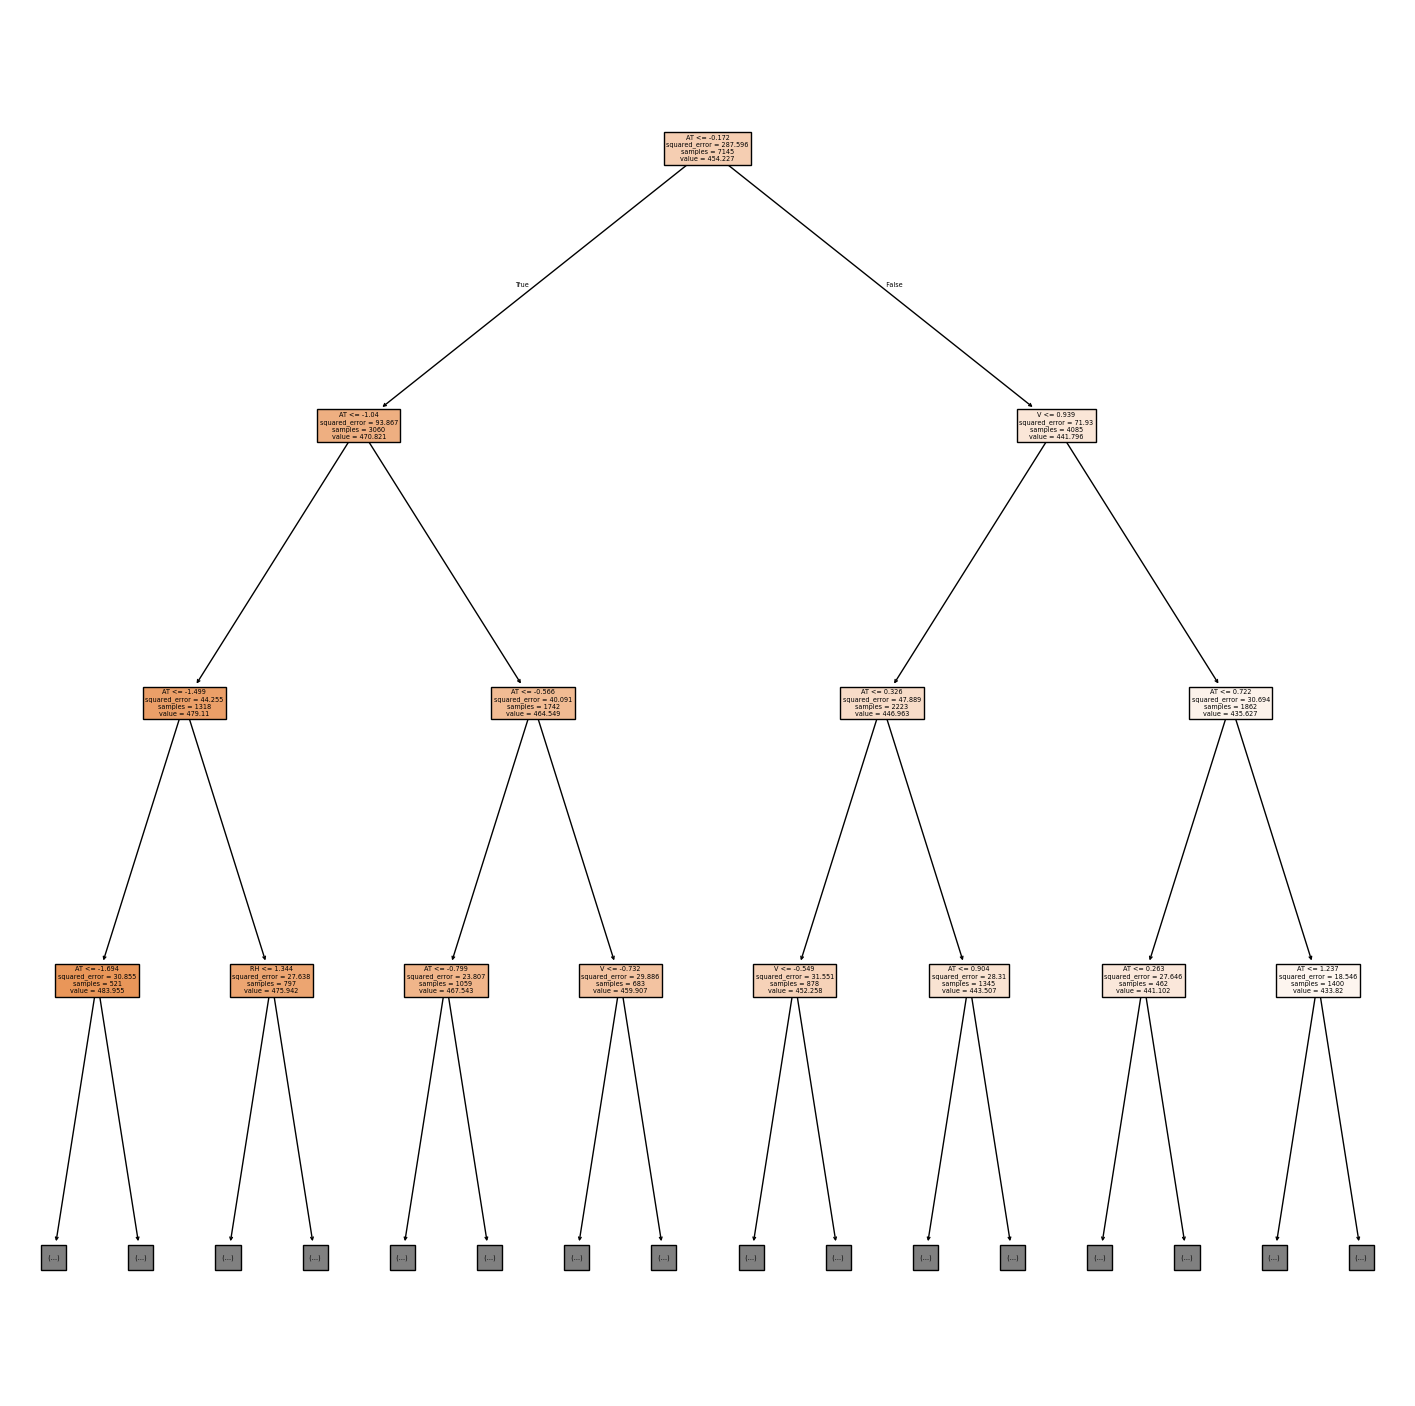

In [125]:
plt.figure(figsize=(18,18))
plot_tree(best_dtr,feature_names=xtrain.columns,max_depth=3,filled=True)
plt.show()

In [127]:
best_dtr.feature_importances_

array([0.89957636, 0.08464544, 0.00809603, 0.00768217])

In [129]:
xtrain.columns

Index(['AT', 'V', 'AP', 'RH'], dtype='object')

In [131]:
imp_features = pd.Series(best_dtr.feature_importances_,index=xtrain.columns)
imp_features

AT    0.899576
V     0.084645
AP    0.008096
RH    0.007682
dtype: float64

<Axes: >

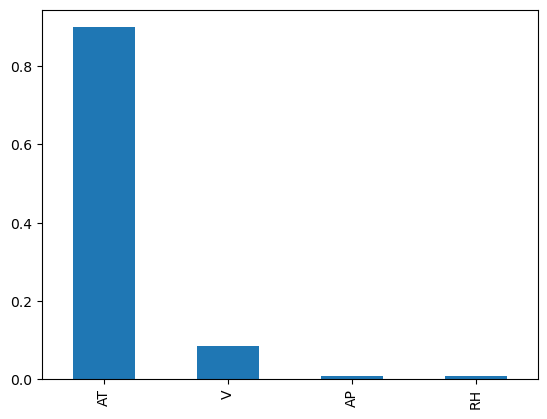

In [133]:
imp_features.plot(kind='bar')

## Model is resulting in highest r2 score >0.8. We can consider this model for Out of Sample Predictions

In [136]:
path2 = r"C:\Users\DELL\Downloads\PowerPlantTest.csv"
xnew = pd.read_csv(path2)
xnew

,AT,V,AP,RH
0,25,51.5,1000.1,57.0
1,32,41.0,1051.1,80.0
2,28,NaN,1010.2,NaN


In [138]:
xnew_pre = con_pipe.transform(xnew)
xnew_pre

,AT,V,AP,RH
0,0.717594,-0.220203,-2.211551,-1.118316
1,1.657948,-1.047911,6.373998,0.456299
2,1.120603,-0.174482,-0.511275,0.113992


In [142]:
PE_predictions = best_dtr.predict(xnew_pre)
PE_predictions = PE_predictions.round(2)
PE_predictions

array([445.69, 436.63, 439.31])

## Save the predicted results to dataframe and save the csv file

In [145]:
xnew["PE_predicted"] = PE_predictions
xnew

,AT,V,AP,RH,PE_predicted
0,25,51.5,1000.1,57.0,445.69
1,32,41.0,1051.1,80.0,436.63
2,28,NaN,1010.2,NaN,439.31


In [147]:
xnew.to_csv("PE_prdicted results.csv")